### LDA(Linear Discriminant Analysis)

- 선형판별분석법이라 불리며 PCA와 매우 유사
- 분류문제에 더 사용하기 쉽도록 데이터 결정 값을 최대한으로 분리
- **클래스간 분산은 최대로, 클래스내의 분산은 최소로 만듦**  
  
LDA의 과정
> 1. 클래스 내부와 클래스간 분산행렬을 구함
> 2. 두 행렬을 고유벡터로 분해
> 3. 고유값이 큰 순으로 K개 추출
> 4. 고유벡터를 이용 새롭게 입력 데이터 변환

#### 차원축소를 하기전 스케일링

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

#### LDA를 이용한 차원축소

In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


#### PCA를 이용한 차원축소(분포 확인을 위해)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


#### 두 차원축소 방법 비교

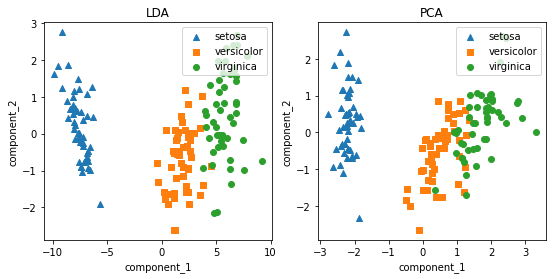

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize = (9,4))
decompositions = [iris_lda,iris_pca]
decompositions_names = ['LDA','PCA']

for k in range(2):
    columns = ['component_1','component_2']
    irisDF = pd.DataFrame(decompositions[k], columns = columns)
    irisDF['target'] = iris.target

    # setosa는 세모 versicolor는 네모, virginica는 동그라미로 표현
    markers = ['^','s','o']

    # 각 타겟별로 다른 shape로 표현
    for i, marker in enumerate(markers):
        x_axis_data = irisDF[irisDF['target']==i]['component_1']
        y_axis_data = irisDF[irisDF['target']==i]['component_2']

        ax[k].scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    ax[k].legend(loc='upper right')    
    ax[k].set_xlabel('component_1')
    ax[k].set_ylabel('component_2')
    ax[k].set_title(decompositions_names[k])

plt.show()

- LDA는 세 분류를 잘 분리하면서도 각각 내부의 분산이 그리 크지 않음을 볼 수 있음
- PCA는 세 분류를 잘 분리했지만 분산이 커 겹치는 현상이 발생

### SVD(Singular Value Decomposition)

- 행과 열이 다른 행렬에 적용가능
- 특이값 분해로 불리며 모든 특이벡터는 서로 직교하는 성질을 가짐

#### scipy로 간단한 구현

랜덤한 행렬 생성

In [41]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


랜덤 행렬 a에 SVD적용

In [42]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


SVD로 얻어진 행렬들을 이용 다시 a로 복원

In [43]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


의존성을 부여하기 위해서 3번째 로우를 1번째+2번째로 수정하고 4번째 로우를 첫번째와 같게 만듦

In [44]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이전과 차원이 같지만 2개가 0으로 바뀜 **(선형독립인 로우벡터의 수가 2개)**

In [45]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [46]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD
- 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 원본행렬을 정확하게 다시 복원하지는 못하지만 상당한 수준으로 근사가능

In [47]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

#### TruncatedSVD를 스케일링 적용, 미적용 그리고 PCA와 비교

Text(0.5, 1.0, 'PCA')

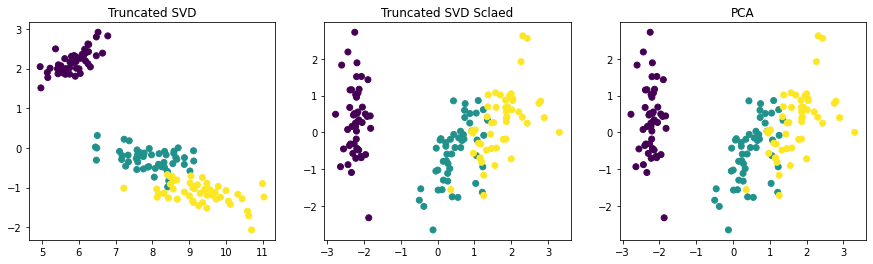

In [52]:
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
iris_ftrs = iris.data

# 스케일링을 적용하지 않은 TSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 스케일링을 적용한 TSVD
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
iris_tsvd_scaled = tsvd.fit_transform(iris_scaled)

# 스케일링을 적용한 PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# Scatter plot 2차원으로 TrucatedSVD변환된 데이터 표현
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(15,4), ncols = 3)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1], c = iris.target)
ax2.scatter(x=iris_tsvd_scaled[:,0],y=iris_tsvd_scaled[:,1], c = iris.target)
ax3.scatter(x=iris_pca[:,0],y=iris_pca[:,1], c = iris.target)

ax1.set_title('Truncated SVD') 
ax2.set_title('Truncated SVD Sclaed') 
ax3.set_title('PCA') 

- TruncatedSVD를 적용한 변수도 나름 클러스터링이 가능한 정도로 고유성이 있음
- TruncatedSVD를 적용하기전 분포를 고르게 하는 스케일링을 적용한 경우 PCA와 매우 유사한 결과를 나타냄

In [56]:
print((iris_pca - iris_tsvd_scaled).mean())
print((pca.components_ - tsvd.components_).mean())

2.240713401861309e-15
-1.474514954580286e-17


### NMF

- 행렬내 모든 원소값이 양수라는 게 보장되면 사용가능
- 일반적으로 긴 행렬W, 작고 넓은 행렬H로 분해
- 영화추천과 같은 추천영역에 활발히 활용됨

Text(0, 0.5, 'NMF Component 2')

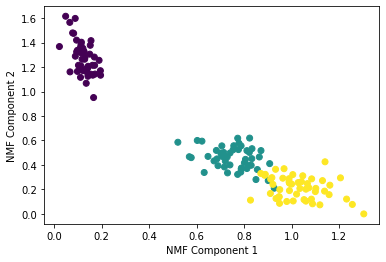

In [57]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
